In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('ticks')

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

In [2]:
data = pd.read_csv('pc_sale_data.csv',index_col = 0)
data.drop(columns = ['Platform','Year','Global_Sales'],axis = 1, inplace = True)
data.head()

,Name,Genre,ESRB_Rating,Publisher,Critic_Score,Platform_count,Multiplatform,Age,Global_Sales_Adj,Frequent_Publisher
0,The Sims 3,Simulation,T,Electronic Arts,8.5,9,1,10.0,6.70232,2
1,Microsoft Flight Simulator,Simulation,E,Microsoft,7.0,1,0,23.0,2.89280,0
2,Half-Life,Shooter,M,Sierra Entertainment,9.5,3,1,21.0,2.45552,1
3,The Sims 4,Simulation,T,Electronic Arts,7.0,4,1,5.0,3.73510,2
4,The Elder Scrolls V: Skyrim,Role-Playing,M,Bethesda Softworks,9.2,4,1,8.0,3.40347,1


In [3]:
data.shape

(303, 10)

In [4]:
data.describe()

,Critic_Score,Platform_count,Multiplatform,Age,Global_Sales_Adj,Frequent_Publisher
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,7.744224,3.089109,0.646865,11.042904,0.293061,1.128713
std,1.267745,2.130350,0.478735,4.346134,0.642723,0.876440
min,1.500000,1.000000,0.000000,1.000000,0.005960,0.000000
25%,7.000000,1.000000,0.000000,8.000000,0.019370,0.000000
50%,8.000000,3.000000,1.000000,10.000000,0.050520,1.000000
75%,8.700000,4.000000,1.000000,13.000000,0.269680,2.000000
max,9.700000,10.000000,1.000000,26.000000,6.702320,2.000000


In [5]:
#keeping values within 5 Standard Deviations since only 2 data points > 5 sd away
data['Global_Sales_Adj'].iloc[0] = 3.5
data['Global_Sales_Adj'].iloc[3] = 3.5

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Text(0.5, 1.0, 'Common Game Publishers')

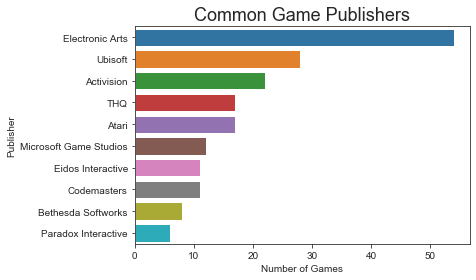

In [6]:
publishers_counts = data.groupby('Publisher')['Publisher'].count().sort_values(ascending = False)
y = list(publishers_counts.index[:10]) #list of publishers
x = list(publishers_counts.values[:10])

sns.barplot(x,y)

#axis labels
plt.xlabel('Number of Games')
plt.ylabel('Publisher')

#fonts
# plt.rc('font', size = 14)
plt.rc('axes', titlesize=18, )     # fontsize of the axes title
plt.rc('axes', labelsize= 18)  # fontsize of the x and y labels
plt.rc('xtick', labelsize = 14)    # fontsize of the tick labels
plt.rc('ytick', labelsize = 14)

plt.title('Common Game Publishers')

In [7]:
#making categorical as type:category
data['Multiplatform'] = data['Multiplatform'].astype('category')
data['ESRB_Rating'] = data['ESRB_Rating'].astype('category')
data['Frequent_Publisher'] = data['Frequent_Publisher'].astype('category')
data['Age'] = data['Age'].astype('int64')

In [8]:
#catagorical for making into dummies
unique_genres = len(data.Genre.unique())
unique_ratings = len(data.ESRB_Rating.unique())
'Genres: ',unique_genres,'Ratings: ',unique_ratings

('Genres: ', 15, 'Ratings: ', 6)

Text(0, 0.5, 'Count')

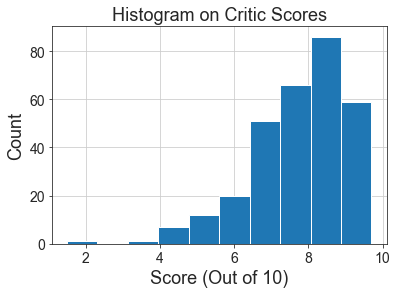

In [9]:
data.hist('Critic_Score') #subtracting by mean will normalize it
plt.title('Histogram on Critic Scores')
plt.xlabel('Score (Out of 10)')
plt.ylabel('Count')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a25a5e5d0>]],
      dtype=object)

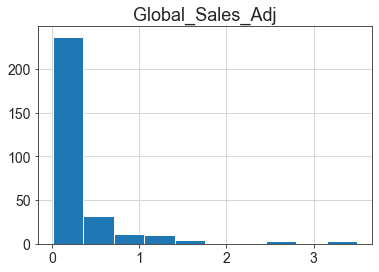

In [10]:
data.hist('Global_Sales_Adj') #taking log can potentially normalize this since looks exponential

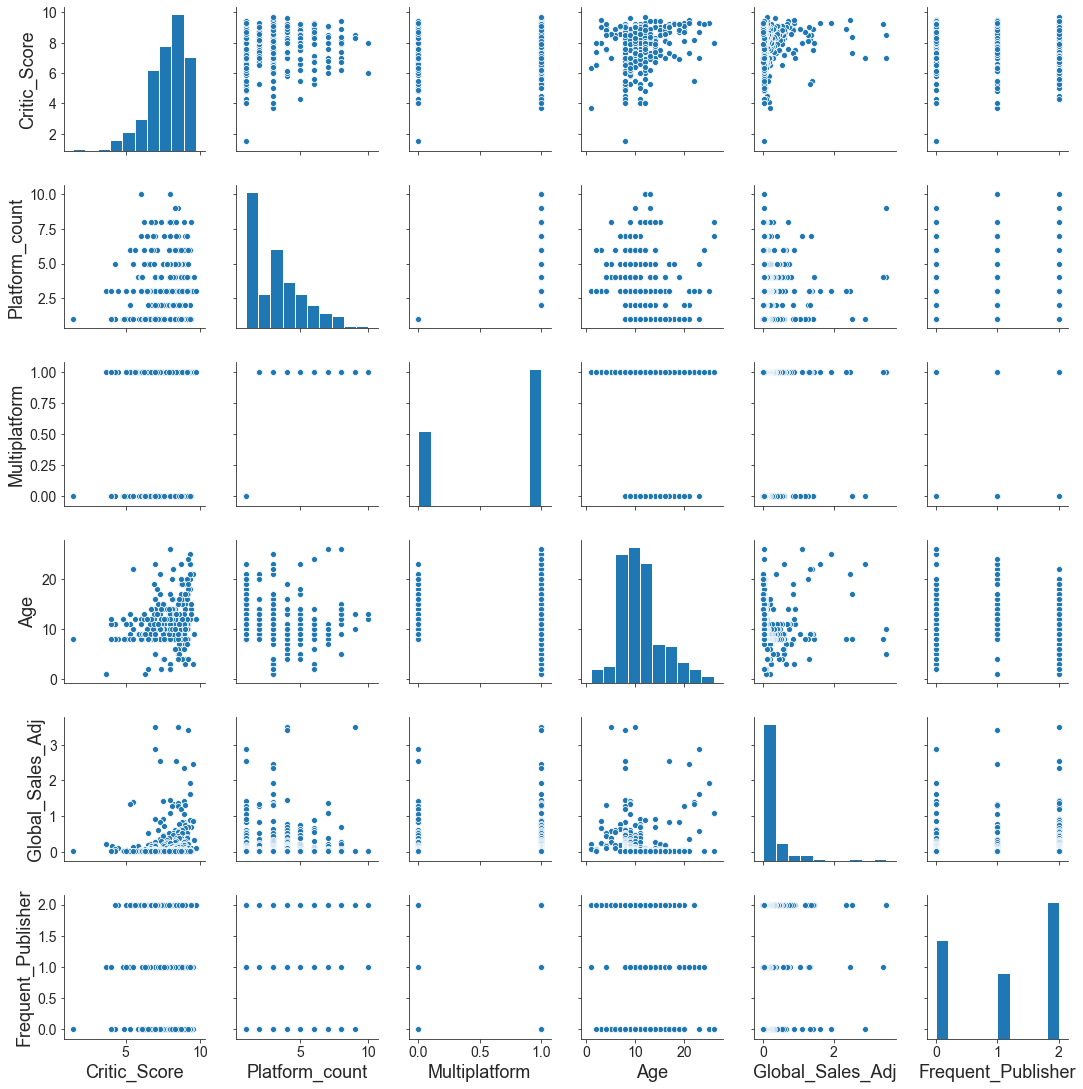

In [11]:
cols = data.columns[2:]
sns.pairplot(data[cols], height = 2.5)
plt.show(); #look for y of global sales

# Transformations

In [12]:
critic_mean = data['Critic_Score'].mean()
critic_std = data['Critic_Score'].std()
data['Normalized_Critic_Score'] = data['Critic_Score'].apply(lambda x: (x-critic_mean)/critic_std)
data['exp_score'] = data['Critic_Score'].apply(lambda x: x**2)

sale_mean = data['Global_Sales_Adj'].mean() #0.2817161386
data['log_sales'] = data['Global_Sales_Adj'].apply(lambda x: np.log(x)) #final decision after trying out other
data['sqrt_sales'] = data['Global_Sales_Adj'].apply(lambda x: np.sqrt(x))
data['log_plus_sales'] = data['Global_Sales_Adj'].apply(lambda x: np.log(x+(sale_mean))) 
data['log_exp_sales'] = data['Global_Sales_Adj'].apply(lambda x: np.log((x+sale_mean))) 

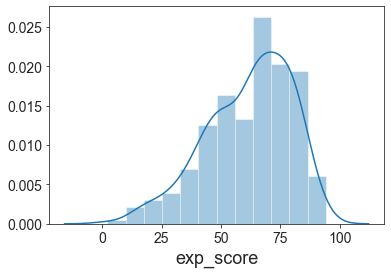

In [13]:
sns.distplot(data['exp_score'],kde=True)

Text(0.5, 1.0, 'Histogram of Log Sales')

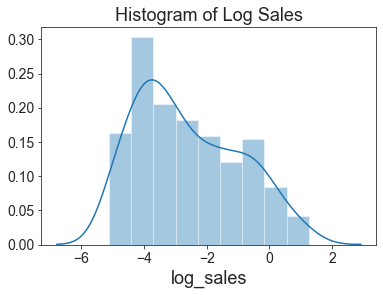

In [14]:
sns.distplot(data['log_sales'],kde=True) #sales looking more linear
plt.title('Histogram of Log Sales')

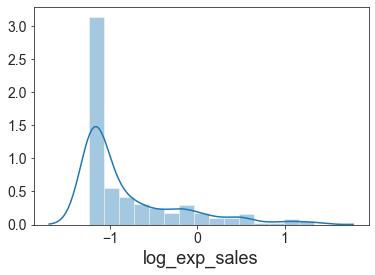

In [15]:
sns.distplot(data['log_exp_sales'],kde=True) #log looks better

QQ-Plot


Text(0.5, 1.0, 'QQ-Plot of Log_Sales')

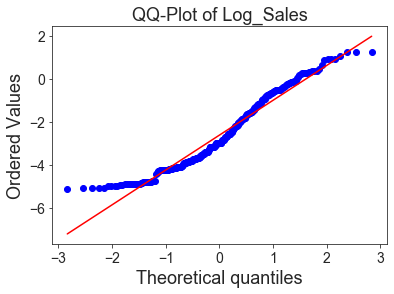

In [16]:
stats.probplot(data['log_sales'],plot = plt)
print('QQ-Plot')
plt.title('QQ-Plot of Log_Sales')

Tried out plots for exp and log_exp to compare with log, but log seemed best. QQ Plot more along the lines

# Statistical Tests:


<b>Anova on Genre</b>

In [17]:
#conducting test using log of sales minimizes error since it is more normal
anova_genre = ols('log_sales~Genre',data=data).fit()
anova_table = sm.stats.anova_lm(anova_genre)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Genre,14.0,75.872115,5.419437,2.097641,0.012055
Residual,288.0,744.072924,2.583587,NaN,NaN


* From this test, we want to test if whether or not the mean of all the different genres' distributions are all equal or atleast one of them are not equal
* From obtaining an F-statistic of 2.097 and a p-value of 0.012055, we reject that each mean are equal to one another since the p value is less than 0.05.
* This means the genre has a impact on sales

<b>ANOVA on publisher frequency

In [18]:
# Anova on Frequency of Publisher
anova_publisher = ols('log_sales~Frequent_Publisher',data=data).fit()
anova_table = sm.stats.anova_lm(anova_publisher)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Frequent_Publisher,2.0,19.642035,9.821017,3.681487,0.02633
Residual,300.0,800.303004,2.667677,NaN,NaN


* From this test, we are testing whether or not being a frequent publisher has an effect on the log sales
* We are testing to see whether or not the means are equal depending on the 3 different frequencys of very frequent, frequent, and not frequent
* When we obtain the F statistic of 3.681487 and p value of 0.02633, we reject the fact that the means of the 3 distributions are equal and say that atleast one of the means are different from the others and that the frequency of publishing does have an impact on sales

<b> ANOVA test on multiplatforms

In [19]:
# Anova on multiplatform or not
anova_multiplatform = ols('log_sales~Multiplatform',data=data).fit()
anova_table = sm.stats.anova_lm(anova_multiplatform)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Multiplatform,1.0,26.153379,26.153379,9.91717,0.001802
Residual,301.0,793.791660,2.637182,NaN,NaN


* Our F-value is large and our p value is small
* We test an conclude a difference of the means showing that the multiplatforms has impact on the sales.

<b>ANOVA on ratings

In [20]:
#p-value close to 0.05 so there may be no difference in ratings
anova_rating = ols('log_sales~ESRB_Rating',data=data).fit()
anova_table = sm.stats.anova_lm(anova_rating)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
ESRB_Rating,4.0,25.581261,6.395315,2.427105,0.04811
Residual,287.0,756.232473,2.634956,NaN,NaN


<b>Simple OLS</b>

Seeing the p value as small, I do a simple OLS to see how well the variable would do on it's own and lot's of the
ratings variables have large p-values pushing me to not use ratings

In [21]:
f = 'log_sales~Genre+ESRB_Rating+Multiplatform+Frequent_Publisher+exp_score'
model = ols(formula = f, data = data).fit()
# model.summary()

---

<b>How will correlation effect our model?</b>

Having variables highly correlated with each other will make our model's variance increase. Since our variables
 don't seem to be highly correlated with one another, we can safely put them all into our model.

In [22]:
corr = data.corr()
corr

,Critic_Score,Platform_count,Age,Global_Sales_Adj,Normalized_Critic_Score,exp_score,log_sales,sqrt_sales,log_plus_sales,log_exp_sales
Critic_Score,1.000000,0.073571,0.227245,0.176202,1.000000,0.989696,0.263199,0.235333,0.239748,0.239748
Platform_count,0.073571,1.000000,-0.103413,0.052493,0.073571,0.065045,0.123641,0.082204,0.077130,0.077130
Age,0.227245,-0.103413,1.000000,0.045134,0.227245,0.235005,-0.197601,-0.051475,-0.040503,-0.040503
Global_Sales_Adj,0.176202,0.052493,0.045134,1.000000,0.176202,0.183886,0.755432,0.942292,0.927963,0.927963
Normalized_Critic_Score,1.000000,0.073571,0.227245,0.176202,1.000000,0.989696,0.263199,0.235333,0.239748,0.239748
exp_score,0.989696,0.065045,0.235005,0.183886,0.989696,1.000000,0.268517,0.243843,0.249232,0.249232
log_sales,0.263199,0.123641,-0.197601,0.755432,0.263199,0.268517,1.000000,0.921614,0.917536,0.917536
sqrt_sales,0.235333,0.082204,-0.051475,0.942292,0.235333,0.243843,0.921614,1.000000,0.997037,0.997037
log_plus_sales,0.239748,0.077130,-0.040503,0.927963,0.239748,0.249232,0.917536,0.997037,1.000000,1.000000
log_exp_sales,0.239748,0.077130,-0.040503,0.927963,0.239748,0.249232,0.917536,0.997037,1.000000,1.000000


Text(0.5, 1, 'Correlation Matrix')

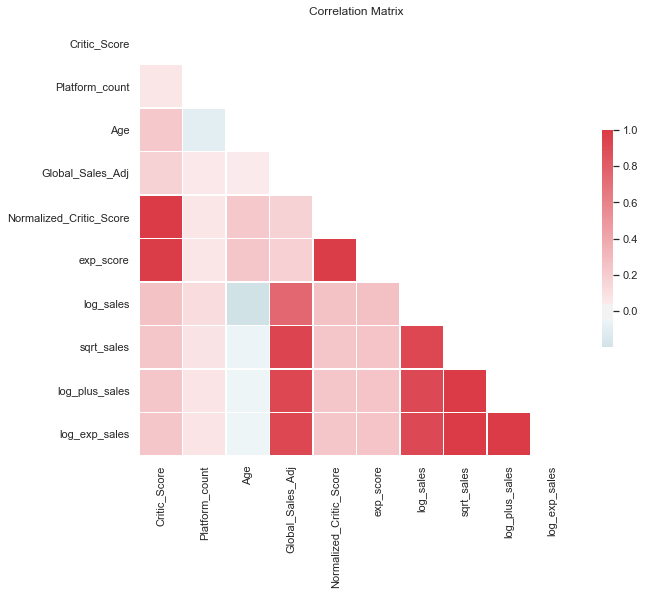

In [23]:
sns.set(style="white")

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix')

In [24]:
#get rid of excess columns
data.drop(columns = ['Critic_Score','Normalized_Critic_Score','sqrt_sales','log_exp_sales','log_plus_sales'],axis = 1,inplace = True)

---
<b>Create dummy variables

In [25]:
data['Age_Copy'] = data['Age']

In [26]:
columns = ['Multiplatform','Age','Frequent_Publisher']
data = pd.get_dummies(data=data, columns=columns, prefix=columns, drop_first=True)
#Drops NOT a multiplatform
#Drops Age 1 which is 1 year old
#Drops NOT a frequent publisher


#Genres: ['Simulation', 'Shooter', 'Role-Playing', 'Strategy', 'Adventure',
#         'MMO', 'Sports', 'Action', 'Action-Adventure', 'Music', 'Racing',
#       'Fighting', 'Platform', 'Misc', 'Puzzle']
#   Dropped: Action:


In [27]:
#Most common genre and ESRB_Rating to drop and use as reference in a model
data.Genre.value_counts(ascending = False).index[0],data.ESRB_Rating.value_counts(ascending = False).index[0]

('Shooter', 'M')

In [28]:
data = pd.get_dummies(data=data, columns=['Genre'], prefix=['Genre'])

In [29]:
data.drop(columns=['Genre_Shooter'],axis = 1, inplace = True)

In [30]:
rename_col = {
    'Genre_Action-Adventure': 'Genre_Action_Adventure',
    'Genre_Role-Playing': 'Genre_Role_Playing'
}
data.rename(columns = rename_col,inplace = True)

In [31]:
data.columns

Index(['Name', 'ESRB_Rating', 'Publisher', 'Platform_count',
       'Global_Sales_Adj', 'exp_score', 'log_sales', 'Age_Copy',
       'Multiplatform_1', 'Age_2', 'Age_3', 'Age_4', 'Age_5', 'Age_6', 'Age_7',
       'Age_8', 'Age_9', 'Age_10', 'Age_11', 'Age_12', 'Age_13', 'Age_14',
       'Age_15', 'Age_16', 'Age_17', 'Age_18', 'Age_19', 'Age_20', 'Age_21',
       'Age_22', 'Age_23', 'Age_24', 'Age_25', 'Age_26',
       'Frequent_Publisher_1', 'Frequent_Publisher_2', 'Genre_Action',
       'Genre_Action_Adventure', 'Genre_Adventure', 'Genre_Fighting',
       'Genre_MMO', 'Genre_Misc', 'Genre_Music', 'Genre_Platform',
       'Genre_Puzzle', 'Genre_Racing', 'Genre_Role_Playing',
       'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy'],
      dtype='object')

<b>Checkpoint

In [32]:
# data_copy = data.copy()

In [33]:
# data = data_copy #checkpoint 

In [34]:
data.reset_index(drop = True,inplace = True)

# OLS Features

In [35]:
drop_cols = [
    'Name','Publisher','Global_Sales_Adj','log_sales','Age_Copy','ESRB_Rating'
#     ,'Platform_count' #from simple OLS
]
features = data.drop(columns = drop_cols, axis = 1)

In [36]:
target = data.log_sales

<b>OLS</b>

In [37]:
ind_v = '+'.join(list((features.columns)))
dep_v = 'log_sales'
f = dep_v+'~'+ind_v
model = ols(f,data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_sales   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     7.969
Date:                Fri, 08 May 2020   Prob (F-statistic):           1.97e-28
Time:                        11:16:38   Log-Likelihood:                -450.73
No. Observations:                 303   AIC:                             991.5
Df Residuals:                     258   BIC:                             1159.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -4.3580      0.887     -4.913      0.000      -6.105      -2.611
Platform_count             0.0686      0.055      1.246      0.214      -0.040       0.177
exp_score                  0.0392      0.004      8.735      0.000       0.030       0.048
Multiplatform_1            0.4275      0.240      1.785      0.075      -0.044       0.899
Age_2                     -2.0109      1.089     -1.847      0.066      -4.155       0.133
Age_3                     -0.5886      1.247     -0.472      0.637      -3.045       1.867
Age_4                     -0.7048      0.995     -0.709      0.479      -2.664       1.254
Age_5                     -0.1849      1.042     -0.177      0.859      -2.237       1.868
Age_6                     -1.3411      1.108     -1.211      0.227      -3.523       0.840
Age_7                     -1.3808      1.070     -1.291      0.198      -3.487       0.726
Age_8                     -0.7738      0.856     -0.904      0.367      -2.459       0.911
Age_9                     -1.4380      0.867     -1.659      0.098      -3.145       0.269
Age_10                    -2.0231      0.873     -2.318      0.021      -3.742      -0.304
Age_11                    -1.6634      0.873     -1.905      0.058      -3.382       0.056
Age_12                    -2.9128      0.881     -3.306      0.001      -4.648      -1.178
Age_13                    -3.4278      0.891     -3.848      0.000      -5.182      -1.673
Age_14                    -2.5246      0.906     -2.788      0.006      -4.308      -0.741
Age_15                    -3.1273      0.976     -3.203      0.002      -5.050      -1.205
Age_16                    -3.3509      0.938     -3.571      0.000      -5.199      -1.503
Age_17                    -2.5662      0.956     -2.685      0.008      -4.448      -0.684
Age_18                    -3.4986      1.106     -3.163      0.002      -5.677      -1.320
Age_19                    -3.7365      0.999     -3.740      0.000      -5.704      -1.769
Age_20                    -3.1067      0.995     -3.123      0.002      -5.065      -1.148
Age_21                    -1.2027      1.107     -1.087      0.278      -3.382       0.976
Age_22                     1.2332      1.188      1.038      0.300      -1.106       3.572
Age_23                     0.6899      1.099      0.628      0.531      -1.474       2.854
Age_24                    -3.9707      1.898     -2.092      0.037      -7.708      -0.233
Age_25                     0.9904      1.468      0.674      0.501      -1.901       3.882
Age_26                    -1.7391      1.231     -1.412      0.159      -4.164       0.686
Frequent_Publisher_1       0.4036      0.210      1.917      0.056      -0.011       0.818
Frequent_Publisher_2       0.7434      0.179      4.146      0.000       0.390  

* Some Genres and some Ages have large p-values, but they are dummies
* Being as a dummy, don't drop single variables, instead reengineer the values like 'Age' to be 'Recent Release' since ages > 10 have large p-values.
* Drop Platform_count since large p-value and not dummy

In [38]:
drop_features = ['Platform_count']
features = features.drop(columns = drop_features)

<b>Replacing dummies with new feature pertaining to age

In [39]:
# drop_ages = features.iloc[:,2:27] #get all age dummies
# drop_cols = drop_ages.columns 
# features.drop(columns = drop_cols, inplace = True)

In [40]:
# features['Age'] = data_copy['Age_Copy'] #add back in Age
# # conditions = 
# features['Recent_Release'] = np.select([features['Age'] > 10],[0],1) # Older than 10 means NOT recent, Younger = recent
# features['Recent_Release'] = features['Recent_Release'].astype('category')
# features.drop(columns = 'Age',axis=1,inplace = True)

In [41]:
# #dummy new variable dropping reference point NOT recent
# features = pd.get_dummies(data=features, columns=['Recent_Release'], prefix=['Recent_Release'], drop_first=True)

In [42]:
# data['Recent_Release_1'] = features['Recent_Release_1']

In [43]:
ind_v = '+'.join(list((features.columns)))
dep_v = 'log_sales'
f = dep_v+'~'+ind_v
model = ols(f,data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_sales   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     8.101
Date:                Fri, 08 May 2020   Prob (F-statistic):           1.35e-28
Time:                        11:16:44   Log-Likelihood:                -451.64
No. Observations:                 303   AIC:                             991.3
Df Residuals:                     259   BIC:                             1155.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -4.3856      0.888     -4.941      0.000      -6.133      -2.638
exp_score                  0.0394      0.004      8.793      0.000       0.031       0.048
Multiplatform_1            0.6192      0.184      3.371      0.001       0.258       0.981
Age_2                     -1.9949      1.090     -1.830      0.068      -4.141       0.151
Age_3                     -0.5728      1.248     -0.459      0.647      -3.031       1.886
Age_4                     -0.6844      0.996     -0.687      0.492      -2.645       1.276
Age_5                     -0.0414      1.037     -0.040      0.968      -2.083       2.001
Age_6                     -1.1926      1.103     -1.082      0.280      -3.364       0.979
Age_7                     -1.2980      1.069     -1.214      0.226      -3.403       0.807
Age_8                     -0.7276      0.856     -0.850      0.396      -2.413       0.958
Age_9                     -1.3762      0.867     -1.588      0.113      -3.083       0.330
Age_10                    -1.9545      0.872     -2.241      0.026      -3.672      -0.237
Age_11                    -1.5770      0.871     -1.810      0.071      -3.293       0.138
Age_12                    -2.8412      0.880     -3.228      0.001      -4.574      -1.108
Age_13                    -3.3262      0.888     -3.745      0.000      -5.075      -1.577
Age_14                    -2.4321      0.904     -2.692      0.008      -4.211      -0.653
Age_15                    -3.0414      0.975     -3.119      0.002      -4.961      -1.121
Age_16                    -3.3235      0.939     -3.539      0.000      -5.173      -1.474
Age_17                    -2.5314      0.956     -2.647      0.009      -4.415      -0.648
Age_18                    -3.4009      1.104     -3.079      0.002      -5.576      -1.226
Age_19                    -3.6865      0.999     -3.689      0.000      -5.654      -1.719
Age_20                    -3.0987      0.996     -3.112      0.002      -5.059      -1.138
Age_21                    -1.1954      1.108     -1.079      0.282      -3.377       0.986
Age_22                     1.2203      1.189      1.026      0.306      -1.121       3.561
Age_23                     0.7478      1.099      0.680      0.497      -1.417       2.912
Age_24                    -3.7525      1.892     -1.983      0.048      -7.478      -0.027
Age_25                     1.0094      1.470      0.687      0.493      -1.885       3.904
Age_26                    -1.4208      1.206     -1.178      0.240      -3.796       0.954
Frequent_Publisher_1       0.3846      0.210      1.830      0.068      -0.029       0.798
Frequent_Publisher_2       0.7564      0.179      4.220      0.000       0.403       1.109
Genre_Action              -0.2294      0.268     -0.854      0.394      -0.758  

* R-squared moving from 57.4% to  35.8% after removing Age from the equation. Put it back in and handle it with other feature selection methods

---

# Modeling

In [44]:
x_train, x_test, y_train, y_test = train_test_split(features, target, random_state=22, test_size=0.2)

Standard Scaler no change

In [45]:
scaler = MinMaxScaler()
scaler.fit_transform(x_train)
x_train =pd.DataFrame(data=scaler.transform(x_train), columns=list(features.columns))
x_test =pd.DataFrame(data=scaler.transform(x_test), columns=list(features.columns))

<b> Simple Linear Reg

In [46]:
slr = LinearRegression()
slr.fit(x_train,y_train)
y_train_pred, y_test_pred = np.exp(slr.predict(x_train)),np.exp(slr.predict(x_test))

In [47]:
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
train_rmse,test_rmse

(3.1416866883468586, 3.2846811140646954)

# Final Model

<b>Lasso

In [48]:
from sklearn.linear_model import Lasso
result_table = []

In [49]:
## training the model
#alpha = [0.10,0.075,0.05,0.025,0.01,0.001] #alphas for tables
alpha = 0.05
lasso = Lasso(alpha=alpha, normalize=False)

lasso.fit(x_train,y_train) #fit

y_train_pred_lasso = np.exp(lasso.predict(x_train))  #predict training y data
y_pred_lasso = np.exp(lasso.predict(x_test))         #predict test y data

train_rmse_lasso = np.sqrt(metrics.mean_squared_error(y_train,y_train_pred_lasso))
test_rmse_lasso = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)) #calculate rmse of testing error

print('Training Error: '+ str(train_rmse_lasso))
print('Testing Error: '+ str(test_rmse_lasso))

lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = x_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))
#     print()
#     print('Original: ', test_rmse,"vs. Lasso: ",test_rmse_lasso)

coefficient = lasso_coef01.T

result_list = [
    alpha, #alpha
    len(coefficient[coefficient[0] != 0]), #features selected
    train_rmse_lasso,
    test_rmse_lasso
]

result_table.append(result_list)

Training Error: 3.128189016446011
Testing Error: 3.232237647801952


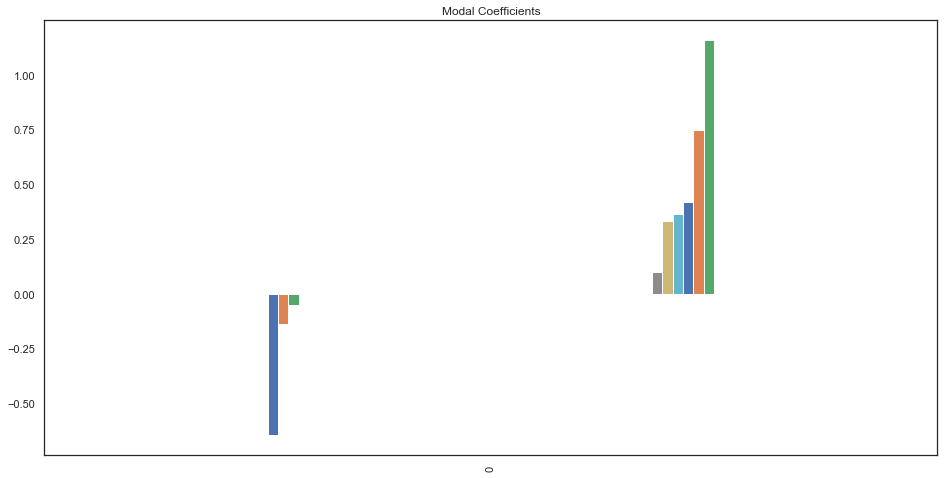

In [51]:
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

Text(0.5, 1.0, 'Residual Plot')

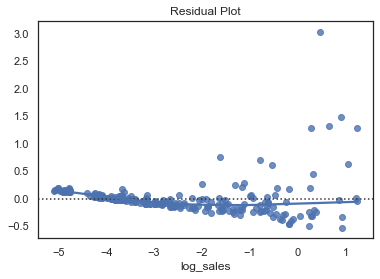

In [61]:
sns.residplot( y_train, y_train_pred,lowess=True, color="b")
plt.title('Residual Plot')

In [50]:
coefficient = lasso_coef01.T
coefficient[coefficient[0] != 0]

,0
Age_13,-0.646847
Age_12,-0.137748
Genre_Action,-0.052290
Age_9,0.097800
Multiplatform_1,0.330200
Frequent_Publisher_2,0.364410
Genre_Simulation,0.417475
Age_8,0.748525
exp_score,1.157879


# Final Paragraph

This model has a high RMSE because of its inability to predict the higher totaling global sales. This could be attributed because the important of interaction terms between data that I did not engineer. A couple things to notice are Ages > 10 have a negative coefficient and Ages < 10 have a positive coefficient when referenced to age 0 which is 2019. This can imply that there is a bigger importance of time for analyzing the sales making a time series analysis a potentially better model. We can also note that a higher critic score leads to higher total sale, but the only thing we can do is try to do is make a game that people would like, which already goes without saying. Some things that we can what we can actually see and takeaway from this model is the potential increase of total sales by  seeking a frequent, making a multiplatform,publisher, or making a simulation game. This all makes sense intuitively as well!

In [270]:
table2 = pd.DataFrame(result_table, columns = ['alpha','Number of Features','Training RMSE','Test RMSE'])

In [282]:
table2.reset_index().drop(columns = 'index')

,alpha,Number of Features,Training RMSE,Test RMSE
0,0.150,1,3.132060,3.235864
1,0.100,3,3.130799,3.236111
2,0.075,6,3.129578,3.235153
3,0.050,9,3.128189,3.232238
4,0.040,9,3.128419,3.231295
5,0.030,13,3.128884,3.230848
6,0.025,16,3.128747,3.230394
7,0.010,30,3.126165,3.238358


# Other Feature Selection/Model tests

<b>KBest

In [52]:
comp_table = []

In [53]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=2)

selector.fit(x_train, y_train)

selected_columns = x_train.columns[selector.get_support()]
removed_columns = x_train.columns[~selector.get_support()]


In [54]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest = lm_kbest.fit(x_train[selected_columns], y_train)

y_train_kbest = np.exp(lm_kbest.predict(x_train[selected_columns]))


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = np.exp(lm_kbest.predict(x_test[selected_columns]))

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)

print()
print('Original: ', test_rmse,"vs. Lasso: ",test_rmse_lasso,"vs. KBest: ", testK_rmse)

Training Root Mean Squared Error: 3.134683410904458
Testing Root Mean Squared Error: 3.2375608514472742

Original:  3.2846811140646954 vs. Lasso:  3.232237647801952 vs. KBest:  3.2375608514472742


In [55]:
comp_table.append([len(selected_columns), trainK_rmse, testK_rmse])

<b>RFECV

In [56]:
from sklearn import linear_model
from sklearn.feature_selection import RFECV


In [57]:

rfe = linear_model.LinearRegression()
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=rfe, step=1, cv=10, scoring='neg_mean_squared_error')
# Fit recursive feature eliminator 
selector.fit(x_train, y_train)

selected_rfe = x_train.columns[selector.support_]
removed_rfe = x_train.columns[~selector.support_]

In [58]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(x_train[selected_rfe], y_train)

y_rfe = np.exp(lm_rfe.predict(x_train[selected_rfe]))


trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))


print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred_rfe = np.exp(lm_rfe.predict(x_test[selected_rfe]))

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print('Testing Root Mean Squared Error:' , testRFE_rmse)


print('Original: ', test_rmse, "vs. Lasso: ",test_rmse_lasso,"vs. KBest: ", testK_rmse, "vs. RFE: ", testRFE_rmse, )

Training Root Mean Squared Error: 3.1385801472365302
Testing Root Mean Squared Error: 3.3167726747610513
Original:  3.2846811140646954 vs. Lasso:  3.232237647801952 vs. KBest:  3.2375608514472742 vs. RFE:  3.3167726747610513
